In [ ]:
#임포트 및 맷플롯 한글깨짐 방지
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import requests

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
# 카카오 api 위경도 추출 함수

def geocode_kakao(address):
    url = "https://dapi.kakao.com/v2/local/search/address.json"
    headers = {"Authorization": "KakaoAK 1a7bbcac25c8dcb03ef504caeaba251e"}  # 정확한 키 입력 필요
    params = {"query": address}
    response = requests.get(url, headers=headers, params=params)

    if response.status_code == 200:
        results = response.json().get("documents")
        if results:
            return float(results[0]['y']), float(results[0]['x'])
        else:
            print("No results found.")
    else:
        print(f"Failed to get data. Status code: {response.status_code}")
        print("Response:", response.json())

    return None, None

In [ ]:
#데이터 업로드
df = pd.read_csv('초중고 좌표.csv')
df

,학교ID,학교명,학교급구분,설립일자,설립형태,본교분교구분,운영상태,소재지지번주소,소재지도로명주소,시도교육청코드,시도교육청명,교육지원청코드,교육지원청명,생성일자,변경일자,위도,경도,데이터기준일자,제공기관코드,제공기관명
0,B000007141,순흥초등학교,초등학교,1911-09-08,공립,본교,운영,경상북도 영주시 순흥면 읍내리 378-2,경상북도 영주시 순흥면 순흥로 15,8750000,경상북도교육청,8811000,경상북도영주교육지원청,2013-11-29,2023-11-15,36.912223,128.577297,2024-03-22,C738100,청주대학교 지방교육재정연구원
1,B000007138,남산초등학교,초등학교,1985-03-01,공립,본교,운영,경상북도 영주시 휴천동 680,경상북도 영주시 구성로 257,8750000,경상북도교육청,8811000,경상북도영주교육지원청,2013-11-29,2023-11-15,36.815548,128.626774,2024-03-22,C738100,청주대학교 지방교육재정연구원
2,B000010807,부석중학교,중학교,1954-06-17,공립,본교,운영,경상북도 영주시 부석면 소천리 501-1,경상북도 영주시 부석면 부석로 29,8750000,경상북도교육청,8811000,경상북도영주교육지원청,2013-11-29,2023-11-15,36.977532,128.652894,2024-03-22,C738100,청주대학교 지방교육재정연구원
3,B000013220,영주고등학교,고등학교,1973-03-01,사립,본교,운영,경상북도 영주시 하망동 산36,경상북도 영주시 이산로 31,8750000,경상북도교육청,8811000,경상북도영주교육지원청,2013-11-29,2023-11-15,36.822702,128.641298,2024-03-22,C738100,청주대학교 지방교육재정연구원
4,B000024772,영주가흥초등학교,초등학교,2017-03-01,공립,본교,운영,경상북도 영주시 가흥동 1857,경상북도 영주시 대동로70번길 8-9,8750000,경상북도교육청,8811000,경상북도영주교육지원청,2013-11-29,2023-11-15,36.813761,128.609315,2024-03-22,C738100,청주대학교 지방교육재정연구원
5,B000010801,대영중학교,중학교,1969-03-15,사립,본교,운영,경상북도 영주시 휴천동 1770,경상북도 영주시 구성로150번길 45,8750000,경상북도교육청,8811000,경상북도영주교육지원청,2013-11-29,2023-11-15,36.808980,128.632225,2024-03-22,C738100,청주대학교 지방교육재정연구원
6,B000007149,봉현초등학교,초등학교,1935-07-05,공립,본교,운영,경상북도 영주시 봉현면 대촌리 170,경상북도 영주시 봉현면 소백로1623번길 6,8750000,경상북도교육청,8811000,경상북도영주교육지원청,2013-11-29,2023-11-15,36.847594,128.525809,2024-03-22,C738100,청주대학교 지방교육재정연구원
7,B000013223,한국국제조리고등학교,고등학교,1981-12-31,사립,본교,운영,경상북도 영주시 휴천동 산112,경상북도 영주시 영봉로 28,8750000,경상북도교육청,8811000,경상북도영주교육지원청,2013-11-29,2023-11-15,36.816609,128.642212,2024-03-22,C738100,청주대학교 지방교육재정연구원
8,B000007146,장수초등학교,초등학교,1930-11-01,공립,본교,운영,경상북도 영주시 장수면 반구리 981,경상북도 영주시 장수면 장수로 35,8750000,경상북도교육청,8811000,경상북도영주교육지원청,2013-11-29,2023-11-15,36.776106,128.576552,2024-03-22,C738100,청주대학교 지방교육재정연구원
9,B000010802,영광여자중학교,중학교,1965-11-28,사립,본교,운영,경상북도 영주시 영주동 139,경상북도 영주시 두서길 120,8750000,경상북도교육청,8811000,경상북도영주교육지원청,2013-11-29,2023-11-15,36.832899,128.620822,2024-03-22,C738100,청주대학교 지방교육재정연구원


In [ ]:
#위도 경도 추출
df[['위도', '경도']] = df['위치'].apply(lambda x: geocode_kakao(x)).apply(pd.Series)

   ADM_NM  개수
0    가흥1동   1
1    가흥2동   3
2     단산면   2
3     문수면   1
4     봉현면   1
5     부석면   2
6     상망동   2
7     순흥면   2
8     안정면   1
9    영주1동   4
10   영주2동   1
11    이산면   1
12    장수면   1
13    평은면   1
14    풍기읍   5
15    하망동   4
16   휴천1동   5
17   휴천2동   1
18   휴천3동   1


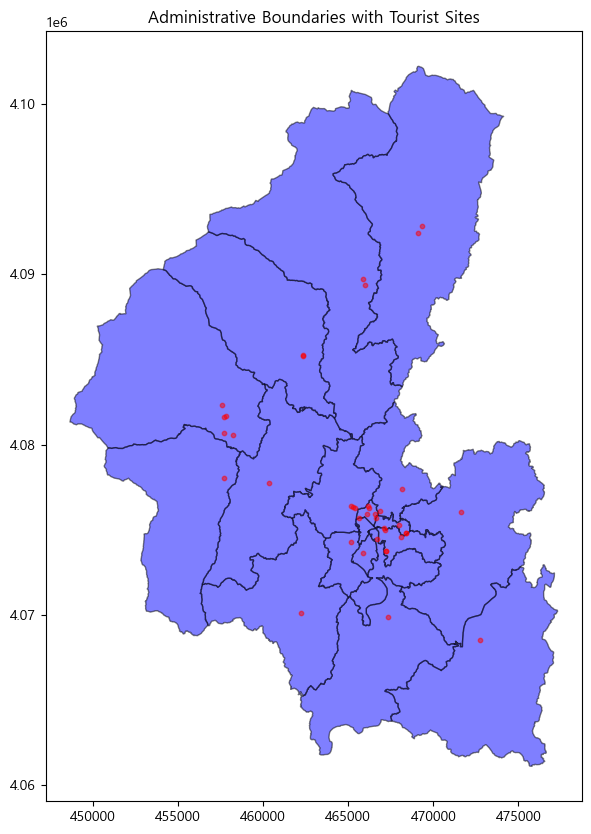

In [ ]:
# 행정구역 데이터 로드
admin_boundaries = gpd.read_file("../공모전_주말/행정구역경계-20240420T052236Z-001/행정구역경계/bnd_dong_37060_2023_2023_2Q.shp")
# 관광지 위치 데이터 로드 및 변환
tourist_sites = df
tourist_sites_gdf = gpd.GeoDataFrame(tourist_sites, geometry=gpd.points_from_xy(tourist_sites.경도, tourist_sites.위도))

tourist_sites_gdf.set_crs('epsg:4326', inplace=True, allow_override=True)

#좌표계 통일
tourist_sites_gdf = tourist_sites_gdf.to_crs(epsg=32652)
admin_boundaries = admin_boundaries.to_crs(epsg=32652)

# 공간 조인 수행
joined_data = gpd.sjoin(admin_boundaries, tourist_sites_gdf, how="inner", predicate='contains')

# 각 행정구역별 관광지 수 계산
tourist_count = joined_data.groupby('ADM_NM').size().reset_index(name='개수')
print(tourist_count)

#둘이 같이 시각화
fig, ax = plt.subplots(1, figsize=(10, 10))
admin_boundaries.plot(ax=ax, color='blue', alpha=0.5, edgecolor='k')
tourist_sites_gdf.plot(ax=ax, color='red', alpha=0.5, markersize=10)
plt.title('Administrative Boundaries with Tourist Sites')
plt.show()

In [ ]:
# 개수 데이터 저장
tourist_count.to_excel('행정구역별 초중고 개수.xlsx',index=False)

#joined_data.to_excel('행정구역별 주차장 현황.xlsx',index=False)